This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [23]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [1]:
import pandas as pd # standard naming convention
import numpy as np

data_partial = pd.read_csv('data/data_000637.txt', nrows=12000)
data_partial

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
11995,1,0,139,3869200286,3251,0
11996,1,0,62,3869200286,3246,4
11997,1,0,58,3869200286,3246,11
11998,1,0,61,3869200286,3251,17


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [2]:
import datetime as dt
itime = dt.datetime.now()

#To be sure I consider all the rows
data = pd.read_csv('data/data_000637.txt')

x=np.max(data['BX_COUNTER'])+1  #adding +1 like for minutes 59+1=60
print('Number of BX in a ORBIT is ',x)
                                          

Number of BX in a ORBIT is  3564


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [3]:
i=len(data)-1
final=data.loc[data.index[i],'TDC_MEAS'] * 25/30. + data.loc[data.index[i], 'BX_COUNTER']*25 + x*(data.loc[data.index[i], 'ORBIT_CNT'])*25
initial=data.loc[data.index[0], 'TDC_MEAS'] * 25./30. + data.loc[data.index[0], 'BX_COUNTER']*25 + x*data.loc[data.index[0], 'ORBIT_CNT']*25
print((final-initial)/(10**9),'sec')



0.9804160933125 sec


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [4]:
print('''I added a column with time with respect to the first data recorded. I considered it as the beginning of data acquisition according to what was done in the previous exercise.\n''')
data['TIME_ns'] =(data['ORBIT_CNT']-data.loc[data.index[0],'ORBIT_CNT'])*x*25+ (data['TDC_MEAS']-data.loc[data.index[0], 'TDC_MEAS']) * 25 / 30 + (data['BX_COUNTER']-data.loc[data.index[0], 'BX_COUNTER']) * 25
data


I added a column with time with respect to the first data recorded. I considered it as the beginning of data acquisition according to what was done in the previous exercise.



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_ns
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.333333e-01
2,1,0,63,3869200167,2553,28,4.476667e+03
3,1,0,64,3869200167,2558,19,4.594167e+03
4,1,0,64,3869200167,2760,25,9.649167e+03
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e+08
1310716,1,1,4,3869211171,763,11,9.804161e+08
1310717,1,0,64,3869211171,764,0,9.804161e+08
1310718,1,0,139,3869211171,769,0,9.804163e+08


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [5]:
data.groupby(['TDC_CHANNEL'],sort=False).size().reset_index(name='counts').sort_values(by='counts',ascending=False)[:3]

,TDC_CHANNEL,counts
5,139,108059
3,64,66020
2,63,64642


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [6]:
print("number of non-empty orbits \t",len(data.groupby(['ORBIT_CNT']).size()))


print(data[data['TDC_CHANNEL']==139].groupby(['ORBIT_CNT']).size())

print("\n\nNumber of unique obits with at least one measurement from TDC_channel=139:", len(data[data['TDC_CHANNEL']==139].groupby(['ORBIT_CNT']).size()))


number of non-empty orbits 	 11001
ORBIT_CNT
3869200167     4
3869200168     8
3869200169    11
3869200170     9
3869200171     9
              ..
3869211167    19
3869211168     8
3869211169    13
3869211170    12
3869211171     2
Length: 10976, dtype: int64


Number of unique obits with at least one measurement from TDC_channel=139: 10976


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

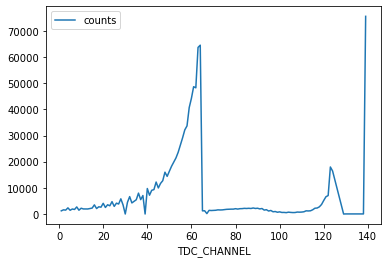

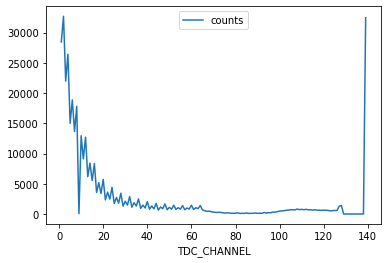

In [7]:
import matplotlib.pyplot as plt

df_fpga0=data[data['FPGA']==0].groupby(['FPGA','TDC_CHANNEL']).size().reset_index(name='counts').sort_values(by=["TDC_CHANNEL"])
df_fpga0.plot(x="TDC_CHANNEL", y="counts");



df_fpga1=data[data['FPGA']==1].groupby(['FPGA','TDC_CHANNEL']).size().reset_index(name='counts').sort_values(by=["TDC_CHANNEL"])
df_fpga1.plot(x="TDC_CHANNEL", y="counts");

In order to check the previous exercise one can check that the 3 peaks summing the two plots correspond to the three channels found earlier
As one can see the three channels with highest occurences are 139, 64, 63


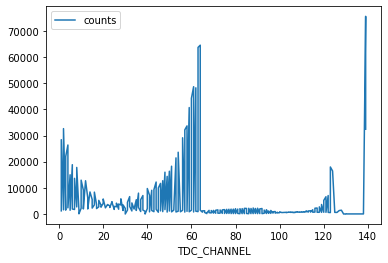

In [8]:
print("In order to check the previous exercise one can check that the 3 peaks summing the two plots correspond to the three channels found earlier")
df_fpga_whatever=data.groupby(['FPGA','TDC_CHANNEL']).size().reset_index(name='counts').sort_values(by=["TDC_CHANNEL"])
df_fpga_whatever.plot(x="TDC_CHANNEL", y="counts");

print("As one can see the three channels with highest occurences are 139, 64, 63")